In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')
data.shape

(2938, 22)

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<AxesSubplot:>

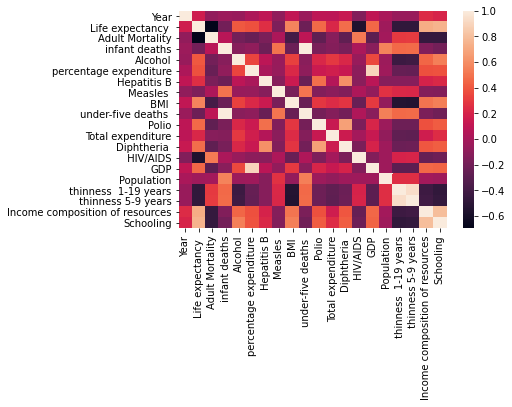

In [5]:
sns.heatmap(data.corr())

In [6]:
mean = data.mean(axis = 0, skipna = True)
mean = np.concatenate((mean[:0], [0], mean[0:]))
mean = np.concatenate((mean[:2], [0], mean[2:]))

In [7]:
data = data.iloc[:, :].values

In [8]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if pd.isna(data[i,j]) == 1:
            data[i,j] = mean[j] 

In [9]:
x = np.delete(data,3,1)
y = data[:,3]
print(x.shape, y.shape)

(2938, 21) (2938,)


In [10]:
labelencoder = LabelEncoder() #for columns 0->Country and 2->Status
x[:, 0] = labelencoder.fit_transform(x[:, 0])
x[:, 2] = labelencoder.fit_transform(x[:, 2])

#onehotencoder = OneHotEncoder(handle_unknown='ignore')
#x = onehotencoder.fit_transform(x).toarray()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2350, 21) (2350,)
(588, 21) (588,)


In [13]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [15]:
MSE = mean_squared_error(y_test, y_predict)
R2E = r2_score(y_test, y_predict)
print("Coefficient: \n", model.coef_)
print("Intercept: \n", model.intercept_)
print("MSE: %.2f \n" % MSE)
print("R2E: %.2f \n" % R2E)

Coefficient: 
 [ 5.17795638e-03 -7.15185376e-03 -1.51047987e+00 -2.01935103e-02
  1.02040220e-01  6.46440605e-02  9.75543488e-05 -1.27339371e-02
 -1.48944672e-05  4.53038337e-02 -7.68066184e-02  2.79823386e-02
  7.75030272e-02  3.66415641e-02 -4.57236794e-01  3.08769934e-05
  1.68315142e-09 -5.54342448e-02 -1.42124612e-04  5.60660366e+00
  7.02706553e-01]
Intercept: 
 69.8177322079236
MSE: 15.33 

R2E: 0.83 



In [22]:
for i in range(len(y_predict)):
    print(y_predict[i], data[i,0:2], y_test[i])

62.06198181181346 ['Afghanistan' 2015] 69.3
68.07678132247064 ['Afghanistan' 2014] 65.0
75.56042764519174 ['Afghanistan' 2013] 69.22493169398912
70.21111028325357 ['Afghanistan' 2012] 69.8
54.344287642112825 ['Afghanistan' 2011] 51.8
73.91318919713363 ['Afghanistan' 2010] 72.9
70.1892544049964 ['Afghanistan' 2009] 75.0
76.65133900485826 ['Afghanistan' 2008] 73.6
65.66463047486045 ['Afghanistan' 2007] 69.9
70.2855971759377 ['Afghanistan' 2006] 72.4
74.53599509576269 ['Afghanistan' 2005] 74.7
71.61468252318731 ['Afghanistan' 2004] 74.0
65.90402590574506 ['Afghanistan' 2003] 55.3
77.07750885839123 ['Afghanistan' 2002] 83.5
79.63859566312576 ['Afghanistan' 2001] 76.7
78.38711131987823 ['Afghanistan' 2000] 71.6
81.32775716302444 ['Albania' 2015] 79.5
68.49158486068296 ['Albania' 2014] 77.0
62.80124179661758 ['Albania' 2013] 63.0
78.52129599628634 ['Albania' 2012] 78.1
79.93043210812493 ['Albania' 2011] 81.5
68.99414365873943 ['Albania' 2010] 67.8
68.34274513441646 ['Albania' 2009] 58.6
69.0

67.99391483802691 ['Belgium' 2012] 67.9
61.915083652757986 ['Belgium' 2011] 66.0
74.20799705004076 ['Belgium' 2010] 72.5
68.47727776654651 ['Belgium' 2009] 68.9
77.12079223603575 ['Belgium' 2008] 76.8
77.00716994520756 ['Belgium' 2007] 75.7
63.65742815144627 ['Belgium' 2006] 61.1
66.54501614535575 ['Belgium' 2005] 63.4
73.95071655625979 ['Belgium' 2004] 77.4
83.65587860258415 ['Belgium' 2003] 81.0
62.82951565502858 ['Belgium' 2002] 62.3
71.11170753621525 ['Belgium' 2001] 68.4
70.36487213974735 ['Belgium' 2000] 65.7
74.65826532780117 ['Belize' 2015] 73.6
56.18339575600153 ['Belize' 2014] 48.1
66.26324235684697 ['Belize' 2013] 65.7
61.32610808799401 ['Belize' 2012] 64.2
71.770693100974 ['Belize' 2011] 67.7
65.38580315273371 ['Belize' 2010] 65.8
79.76987645598456 ['Belize' 2009] 75.5
73.56311835589699 ['Belize' 2008] 78.8
50.50149115346835 ['Belize' 2007] 52.4
76.03199983919028 ['Belize' 2006] 76.9
44.76414057143657 ['Belize' 2005] 48.1
75.48692468281946 ['Belize' 2004] 73.4
75.7082851606

78.27976063672207 ['Cameroon' 2011] 78.2
57.921266854729566 ['Cameroon' 2010] 57.3
77.30357993809267 ['Cameroon' 2009] 74.6
73.14028904203165 ['Cameroon' 2008] 73.6
72.92699335889907 ['Cameroon' 2007] 74.8
74.03997555621046 ['Cameroon' 2006] 78.0
82.07832550423852 ['Cameroon' 2005] 88.0
61.94861121843895 ['Cameroon' 2004] 62.5
80.06530311047439 ['Cameroon' 2003] 82.5
71.84282464498907 ['Cameroon' 2002] 74.4
64.6877085432545 ['Cameroon' 2001] 64.0
66.4319535825557 ['Cameroon' 2000] 63.1
75.17423195971577 ['Canada' 2015] 75.1
59.668888220207855 ['Canada' 2014] 52.4
68.96561924479708 ['Canada' 2013] 71.0
72.0795768536411 ['Canada' 2012] 76.9
64.98994266363145 ['Canada' 2011] 69.9
68.79795069749659 ['Canada' 2010] 63.4
61.4219202668846 ['Canada' 2009] 69.0
74.3245724633719 ['Canada' 2008] 73.9
67.8780938831196 ['Canada' 2007] 69.0
56.05923775681792 ['Canada' 2006] 59.6
43.40759032477035 ['Canada' 2005] 47.8
78.82424083290576 ['Canada' 2004] 79.7
73.998298764978 ['Canada' 2003] 76.4
60.5370

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression - WHO Life Expectancy')

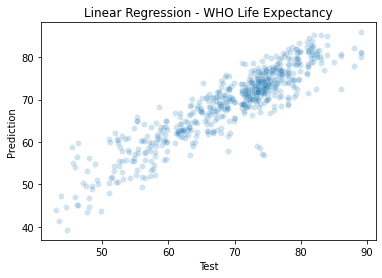

In [21]:
sns.scatterplot(y_test, y_predict, alpha = 0.2)
plt.xlabel("Test")
plt.ylabel("Prediction")
plt.title("Linear Regression - WHO Life Expectancy")